# Pymaceuticals Inc.
---

### Analysis

Top Level Summary: The study data once summarized supports a conclusion that weigh and tumor volume have a positive correlation (higher the weight, bigger the tumor). The drug "Capomulin" demonstrates enthusiastic, as we could observe that over time it decreases the tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()
# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="inner", on=["Mouse ID", "Mouse ID"])
study_data_complete = study_data_complete.rename(columns={'Mouse ID': 'Mouse_ID'})
study_data_complete = study_data_complete.rename(columns={'Tumor Volume (mm3)': 'Tumor_Volume'})
study_data_complete = study_data_complete.rename(columns={'Drug Regimen': 'Drug_Regimen'})
study_data_complete = study_data_complete.rename(columns={'Weight (g)': 'Weight'})
study_data_complete = study_data_complete.rename(columns={'Metastatic Sites':'Metastatic_Sites'})
# Display the data table for preview
study_data_complete
#study_data_complete.count()

,Mouse_ID,Timepoint,Tumor_Volume,Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
print (f"Number of mice in the study: {len(mouse_metadata.index)}")

Number of mice in the study: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated = study_data_complete[study_data_complete[['Mouse_ID', 'Timepoint']].duplicated()]

dup_mice = duplicated.Mouse_ID.unique()
print(dup_mice[0])

g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_complete.query(f'Mouse_ID == "{dup_mice[0]}"')

,Mouse_ID,Timepoint,Tumor_Volume,Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete.drop_duplicates(subset=["Mouse_ID", "Timepoint"])
study_data_clean.count()

Mouse_ID            1888
Timepoint           1888
Tumor_Volume        1888
Metastatic_Sites    1888
Drug_Regimen        1888
Sex                 1888
Age_months          1888
Weight              1888
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(study_data_clean.Mouse_ID.unique()))

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
study_data_clean_TV = study_data_clean[["Drug_Regimen","Tumor_Volume"]]
ME = study_data_clean_TV.groupby("Drug_Regimen").mean()
MD = study_data_clean_TV.groupby("Drug_Regimen").median()
VR = study_data_clean_TV.groupby("Drug_Regimen").var()
ST = study_data_clean_TV.groupby("Drug_Regimen").std()
SE = study_data_clean_TV.groupby("Drug_Regimen").sem()

SM = pd.merge(ME,MD,on='Drug_Regimen')
SM = SM.rename(columns={'Tumor_Volume_x' : 'Mean_Tumor_Volume'})
SM = SM.rename(columns={'Tumor_Volume_y' : 'Median_Tumor_Volume'})
SM = pd.merge(SM,VR,on='Drug_Regimen')
SM = pd.merge(SM,ST,on='Drug_Regimen')
SM = pd.merge(SM,SE,on='Drug_Regimen')
SM = SM.rename(columns={'Tumor_Volume_x' : 'Tumor_Volume_Variance'})
SM = SM.rename(columns={'Tumor_Volume_y' : 'Tumor_Volume_Std_Dev'})
SM = SM.rename(columns={'Tumor_Volume'   : 'Tumor_Volume_Std_Err'})
SM

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

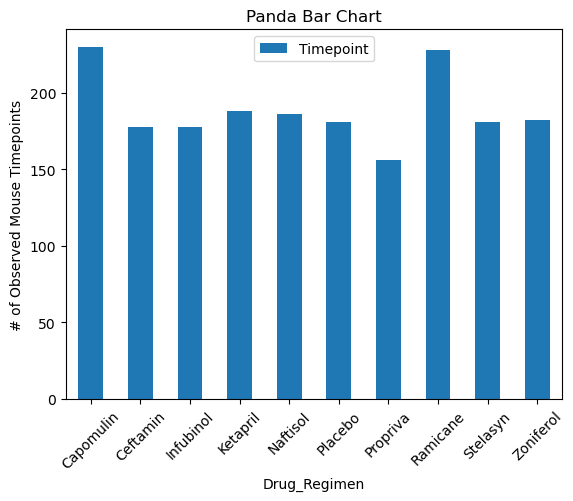

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
study_data_clean.Drug_Regimen.unique().sort()
xlabels=study_data_clean.index.values
study_data_clean_bar = study_data_clean.groupby('Drug_Regimen').count()
study_data_clean_bar
ax = study_data_clean_bar.plot.bar(y='Timepoint', rot=45,title='Panda Bar Chart')
ax.set_ylabel("# of Observed Mouse Timepoints")


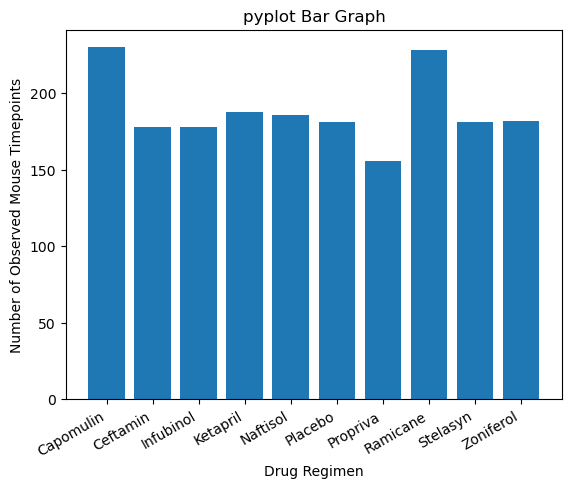

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
study_data_clean.Drug_Regimen.unique().sort()
xlabels=study_data_clean_bar.index.values

study_data_clean_bar = study_data_clean.groupby('Drug_Regimen').count()
study_data_clean_bar

Tp        = study_data_clean_bar.Timepoint
x_axis    = np.arange(len(Tp))  
# creating the bar plot
plt.bar(xlabels, Tp)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xlabels) 
plt.xticks(rotation=30, ha='right')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("pyplot Bar Graph")
plt.show()


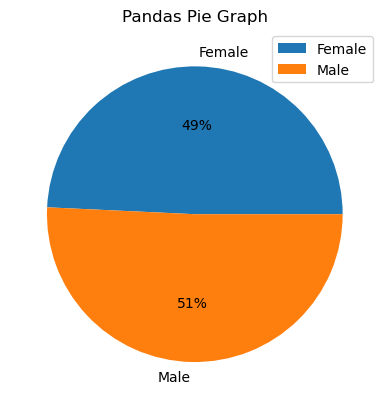

In [11]:
# Generate a  plot showing the distribution of female versus male mice using Panda

gender = study_data_clean.groupby('Sex').count().plot(kind='pie',y='Weight',autopct='%1.0f%%',ylabel='', title='Pandas Pie Graph')


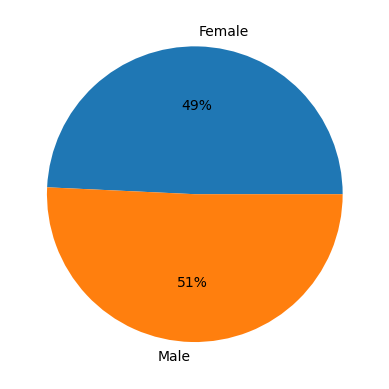

In [12]:
# Generate a pie plot showing the distribuition of female verus male mice using pyplot.

Gender = gender = study_data_clean.groupby('Sex').count()
Gender
labels='Female','Male'
pie = plt.pie(Gender.Weight, labels=labels,autopct='%1.0f%%')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_data_last_tp = study_data_clean.groupby('Mouse_ID').max()

study_data_last_tp

,Timepoint,Tumor_Volume,Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight
Mouse_ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,45.000000,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

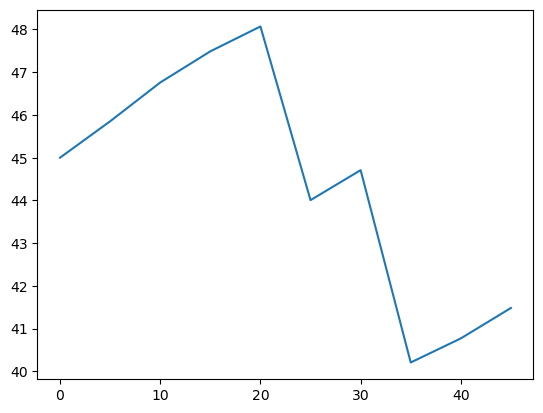

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
DR_Filter=study_data_clean[(study_data_clean["Drug_Regimen"]=="Capomulin") & (study_data_clean["Mouse_ID"]=="l509")]

plt.plot(DR_Filter.Timepoint,DR_Filter.Tumor_Volume)

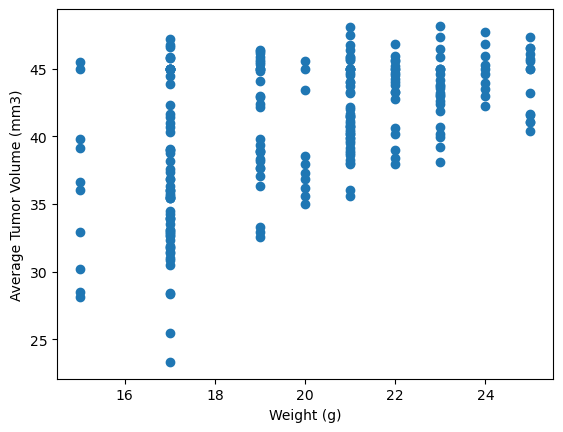

In [17]:
# Generate a scatter plot of mouse weight vs. the average 
#observed tumor volume for the entire Capomulin regimen
DR_Filter=study_data_clean[(study_data_clean["Drug_Regimen"]=="Capomulin")]

x = DR_Filter.Weight
y = DR_Filter.Tumor_Volume


plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

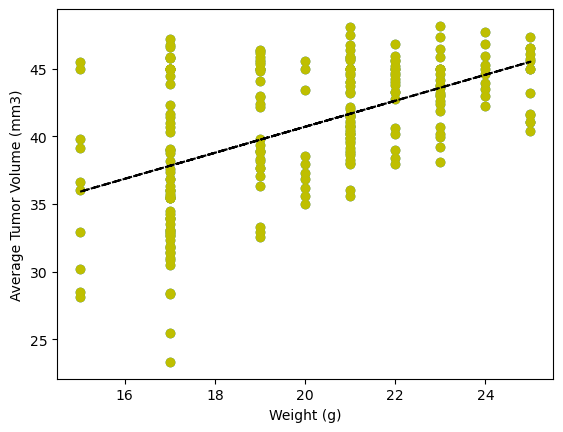

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average 
#observed tumor volume for the entire Capomulin regimen
DR_Filter=study_data_clean[(study_data_clean["Drug_Regimen"]=="Capomulin")]

x = DR_Filter.Weight
y = DR_Filter.Tumor_Volume


m, b = np.polyfit(x, y, 1)

plt.plot(x, y, 'yo', x, m*x+b, '--k')

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()